#****Dataset Overview****

This dataset is used to predict heart disease and contains medical information about patients. It includes details like:


*   Age: The patient's age (in years)

*  Sex: The patient's sex (1 = male, 0 = female)

*   Chest pain type (cp): Different types of chest pain (1-4)

*   Resting blood pressure (trestbps): Blood pressure when admitted to the hospital (in mm Hg)
*  Cholesterol (chol): Cholesterol levels in the blood (in mg/dl)

*  Fasting blood sugar (fbs): Indicates if fasting blood sugar is above 120 mg/dl (1 = true, 0 = false)

*   Resting electrocardiographic results (restecg): ECG results at rest (0-2)

*   Maximum heart rate achieved (thalach): The highest heart rate reached

*   Exercise-induced angina (exang): Chest pain caused by exercise (1 = yes, 0 = no)

*   ST depression (oldpeak): ST depression in the ECG caused by exercise, compared to rest










#****Data Loading and EDA****

In [168]:
# Importing Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [169]:
# Reading The Data
df = pd.read_csv("/content/heart-disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [170]:
# Get Columns Names
print("Columns Names:")
print(df.columns.tolist())

Columns Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [171]:
# Get Data Size
print("Data Size is: ", df.shape)

Data Size is:  (303, 14)


In [172]:
# Get Data Types and more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [173]:
# Check For Missing Values
print("Number Of Missing Values:")
print(df.isnull().sum()) #Gives the total number of missing values per column


Number Of Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [174]:
# Check For Duplicate Values
print("Total Duplicate Values is: ", df.duplicated().sum())

Total Duplicate Values is:  1


In [175]:
# Handling Duplicate Values
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [176]:
# Get Statistical Overview
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


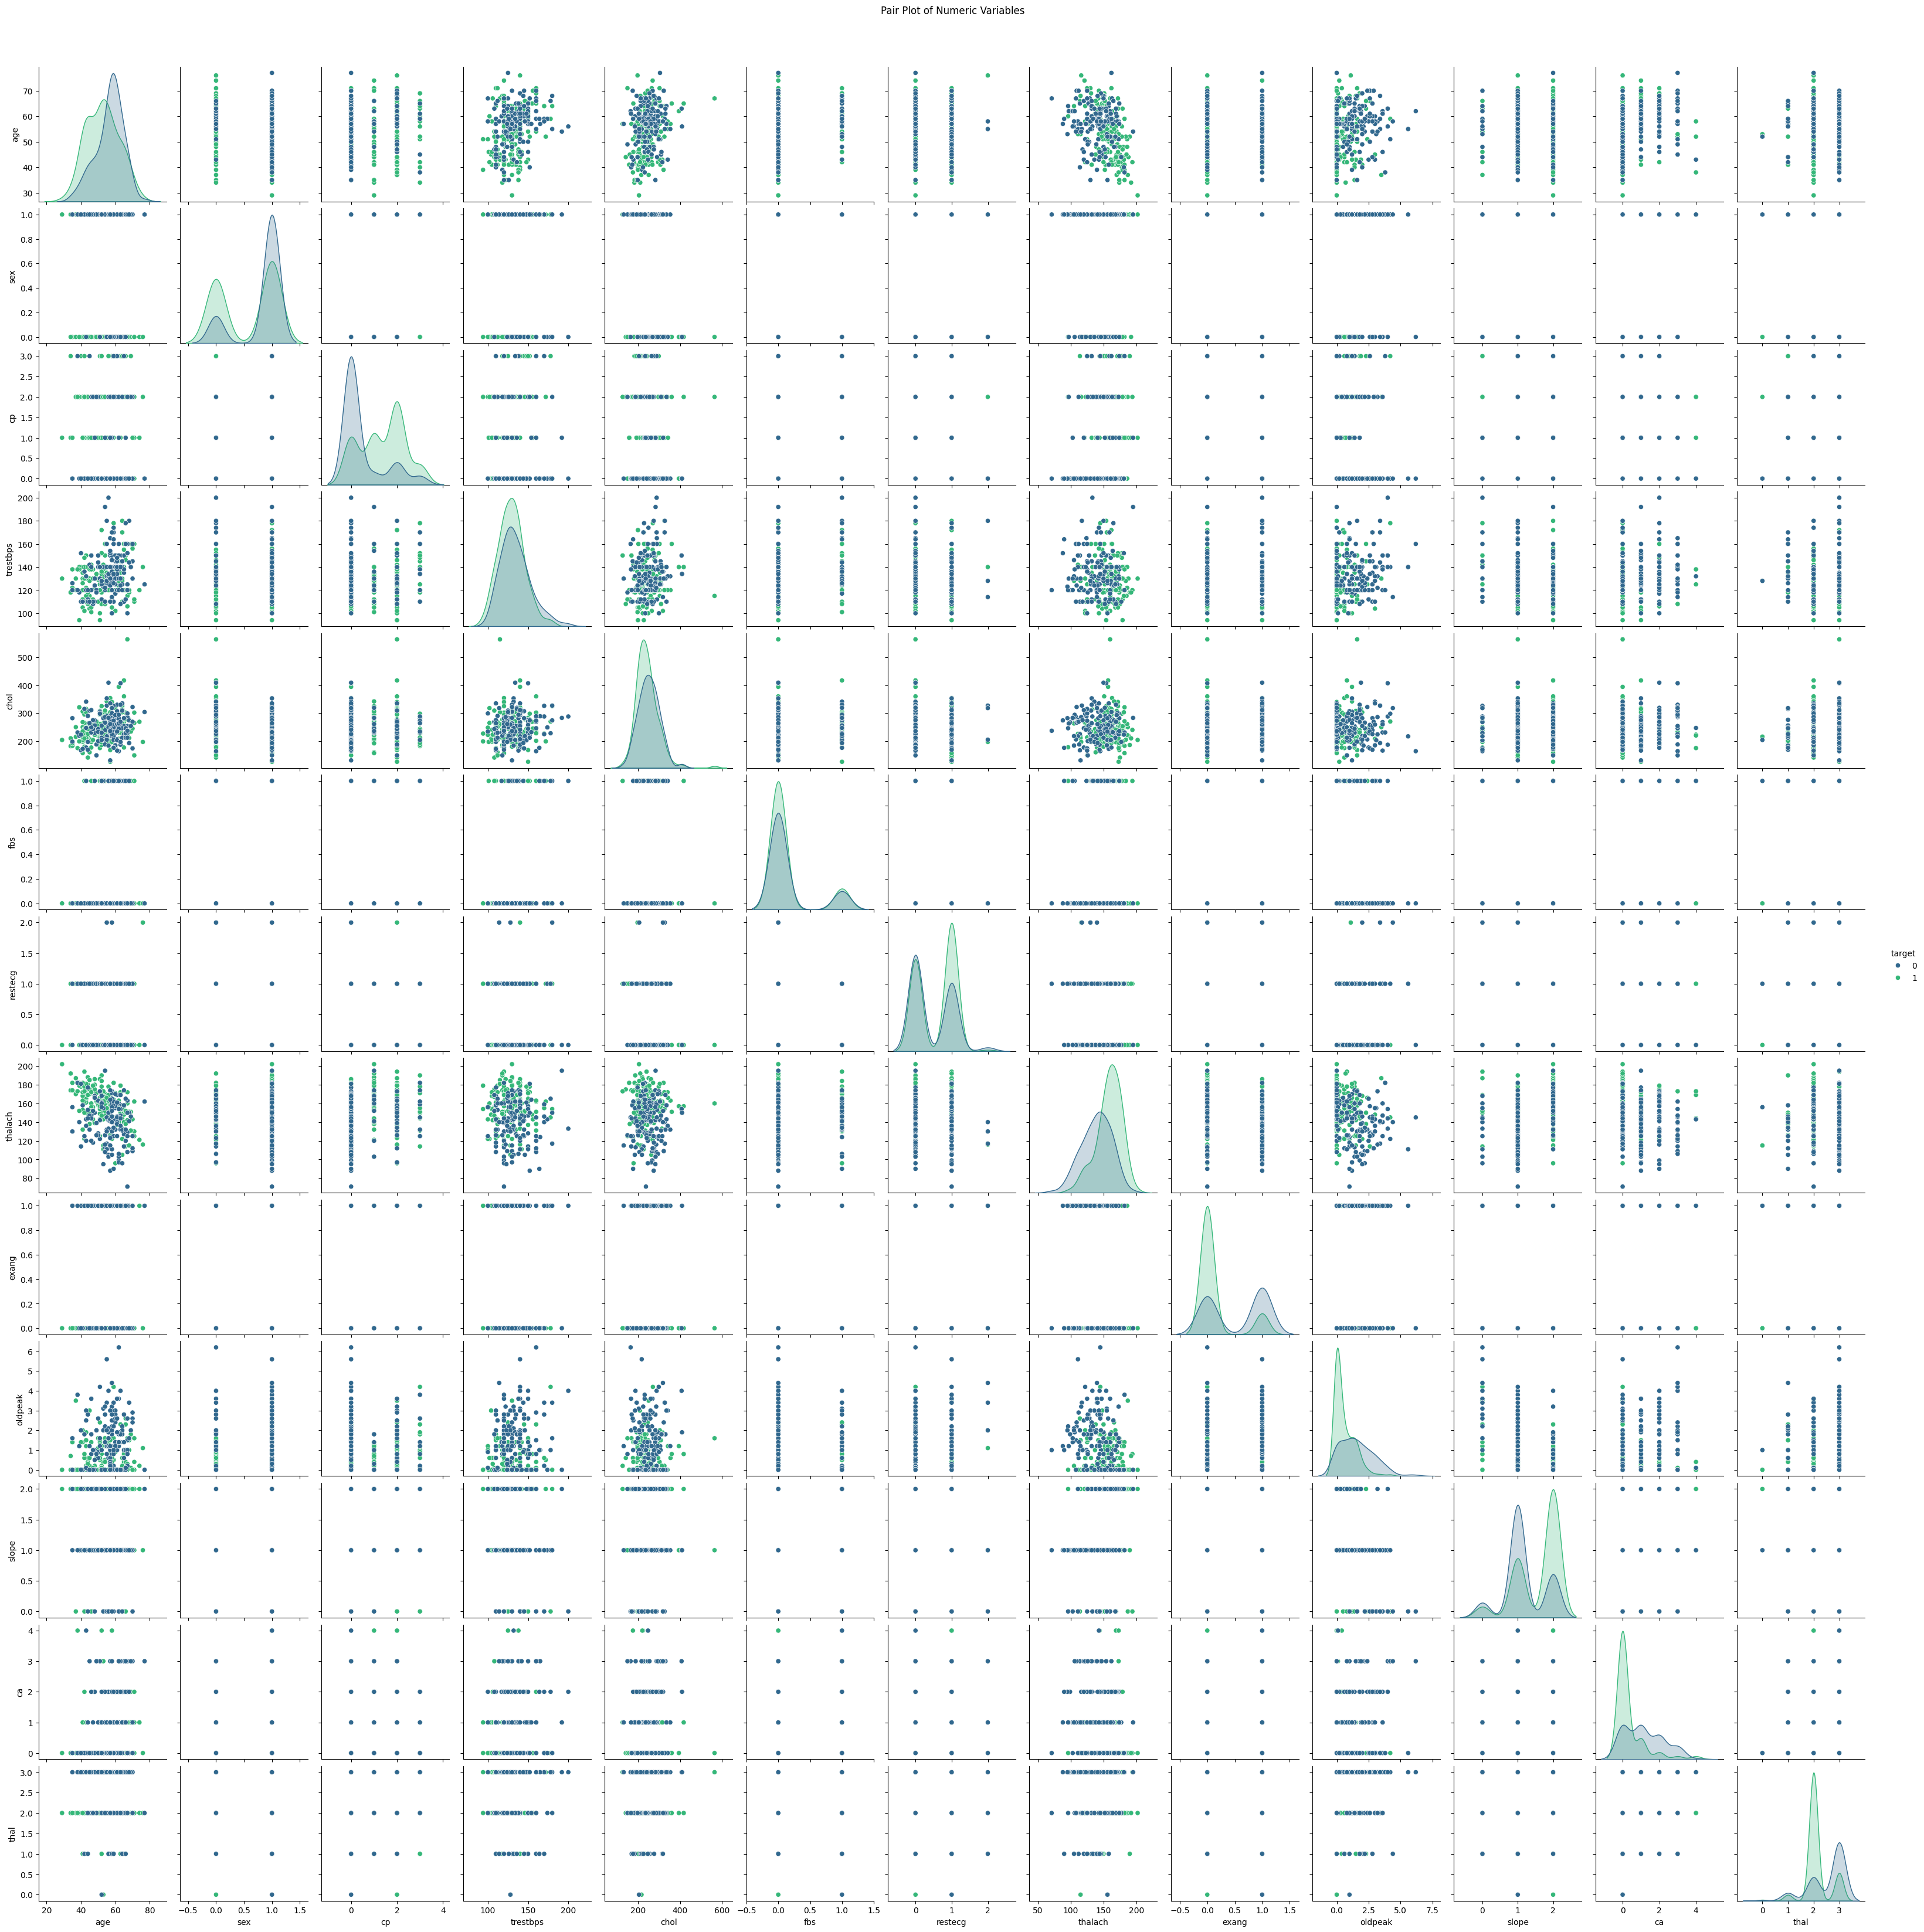

In [177]:
# Detailed exploration of relationships between all pairs
sns.pairplot(df, hue='target', palette='viridis')
# Adding a title to the entire figure
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)  # y=1.02 adjusts the title position upwards
plt.show()

From the Pairplot we see that 'oldpeak' is a skewed_column


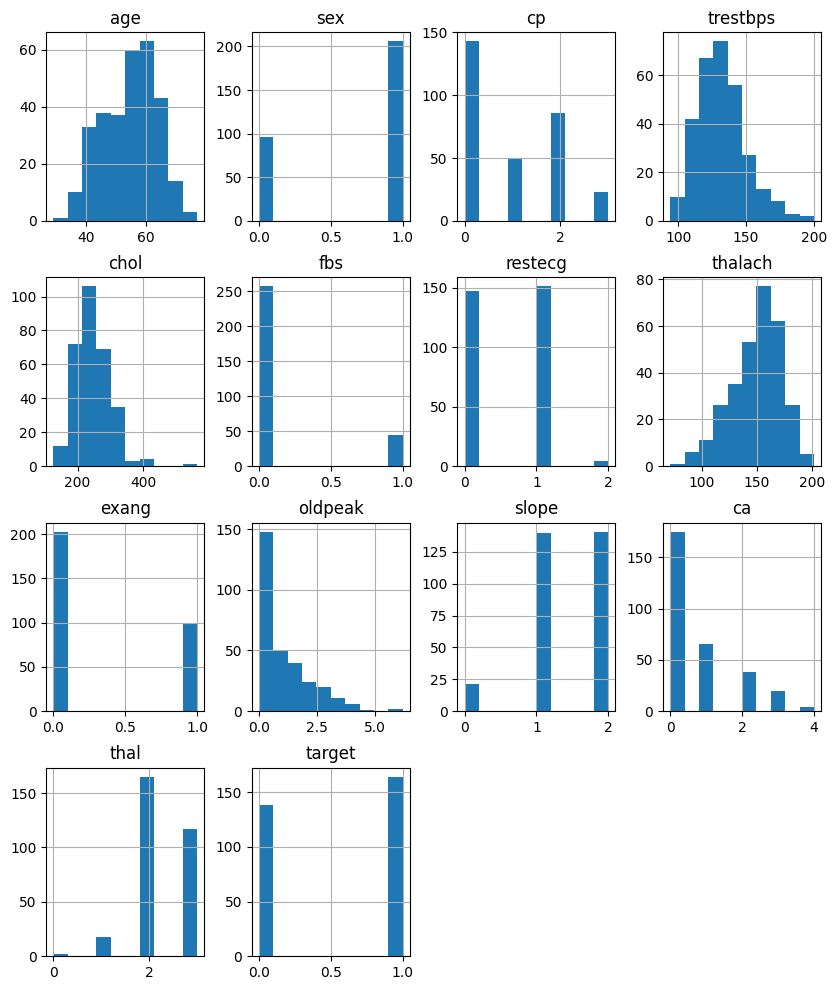

In [178]:
# Numerical distribution of all columns using a histogram.
df.hist(figsize=(10,12))
plt.show()

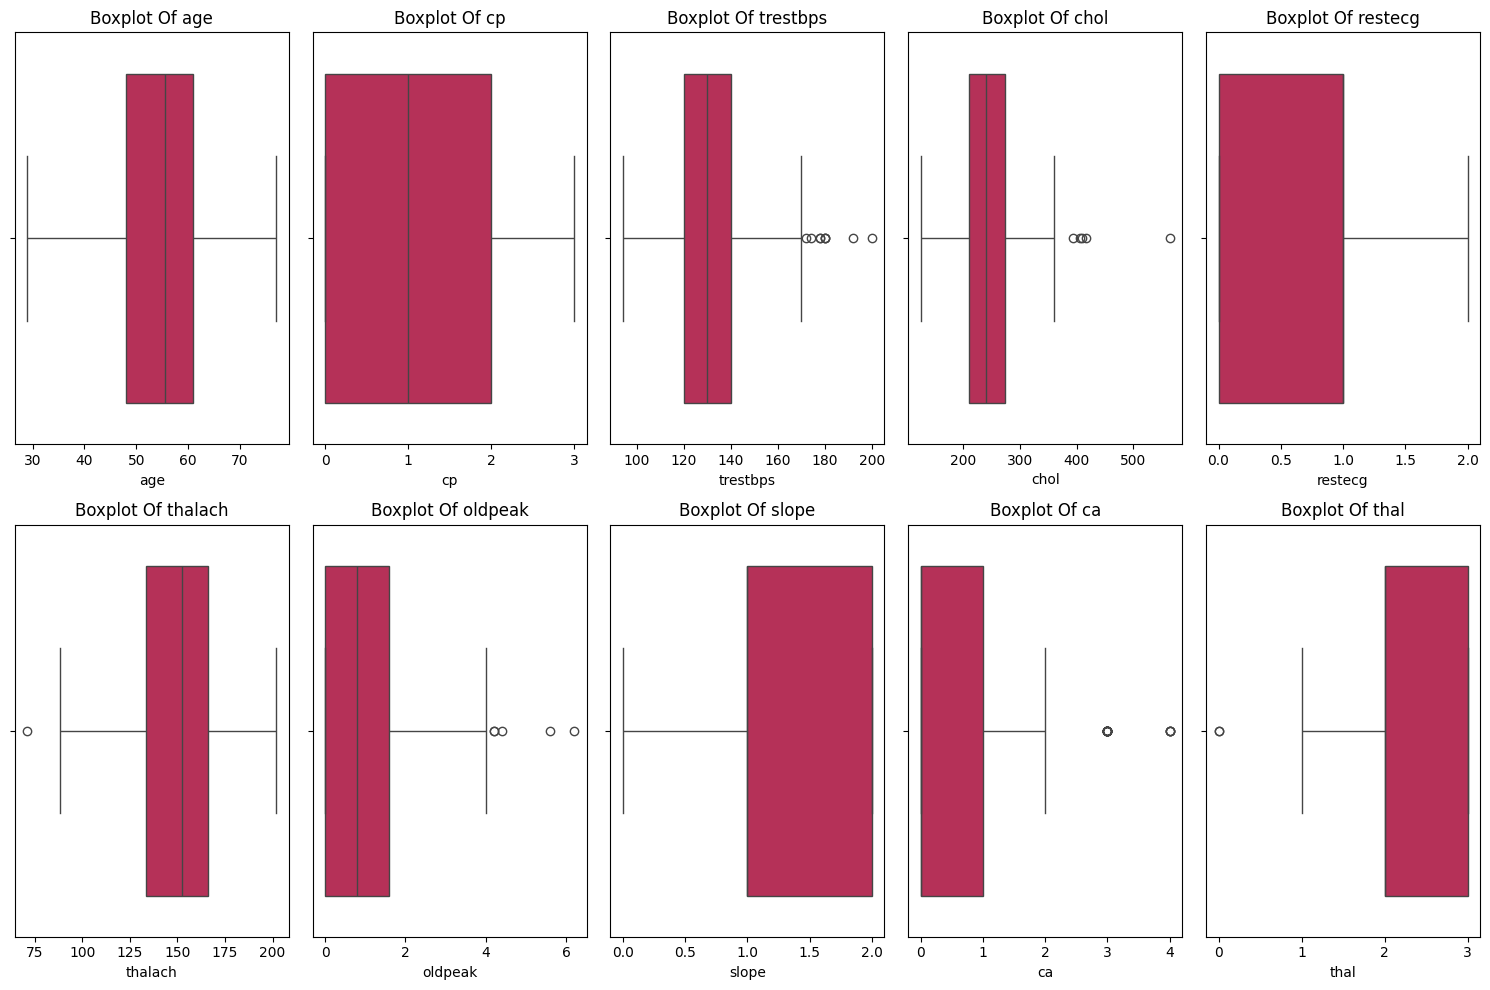

In [179]:
# Creating Boxplot for all columns except those boolean (0-1) values
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns.drop(['target', 'sex', 'fbs', 'exang'])):
    sns.boxplot(data=df, x=col, ax=axes[i], palette='rocket')
    axes[i].set_title(f'Boxplot Of {col}')

plt.tight_layout()
plt.show()

From the Boxplot we see that columns: 'chol', 'oldpeak', 'ca' , 'thal' , 'trestbps' have Outliers that need to be handeld

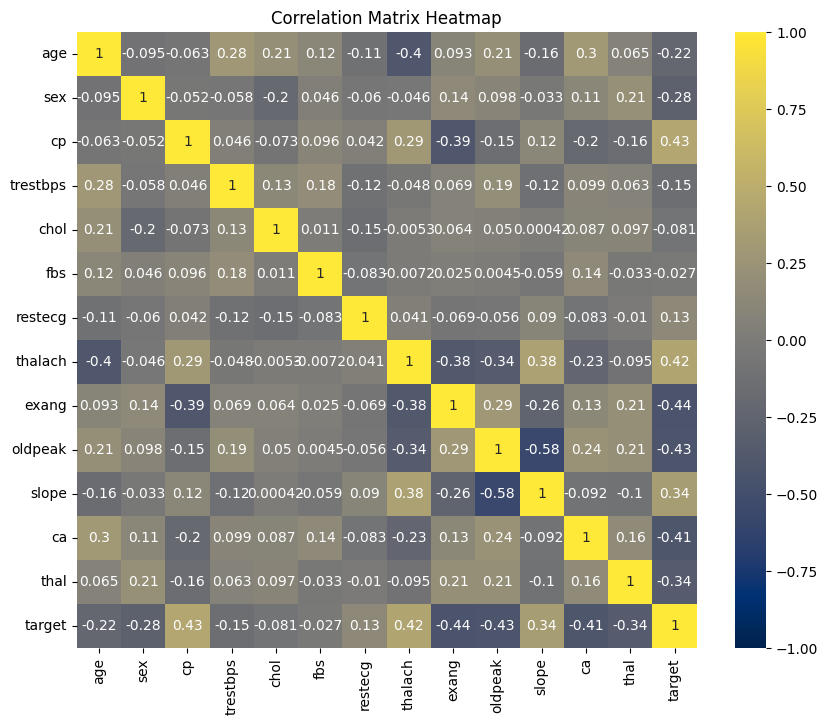

In [180]:
# Visualizing Correlation Matrix (quick overview of the correlation matrix)

corr_matrix = df.corr()  # Calculate correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

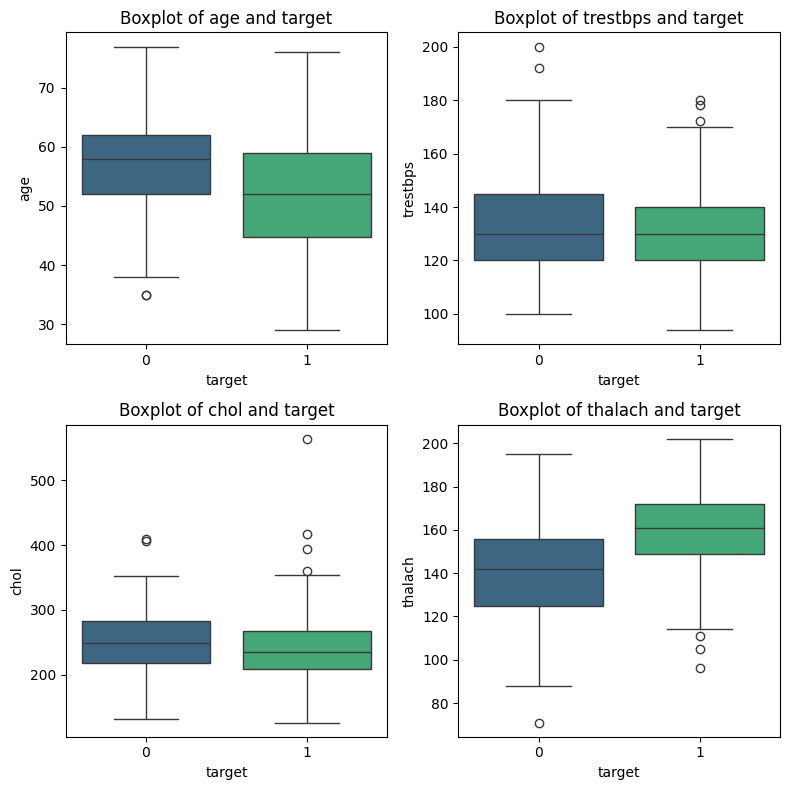

In [181]:
# Relationship between some values and the target

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='target', y='age', palette='viridis')
plt.title('Boxplot of age and target')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='target', y='trestbps', palette='viridis')
plt.title('Boxplot of trestbps and target')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='target', y='chol', palette='viridis')
plt.title('Boxplot of chol and target')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='target', y='thalach', palette='viridis')
plt.title('Boxplot of thalach and target')


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Boxplot of slope and target')

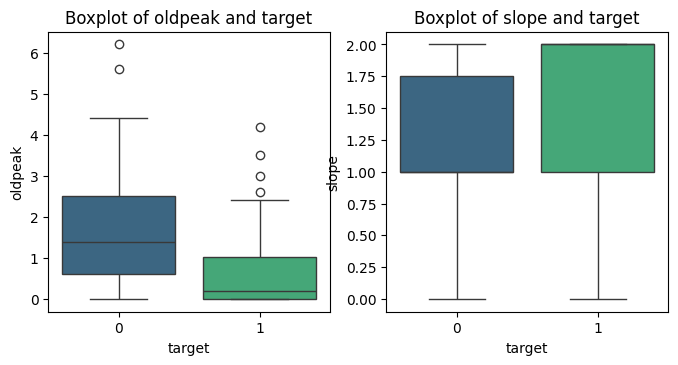

In [182]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='target', y='oldpeak', palette='viridis')
plt.title('Boxplot of oldpeak and target')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='target', y='slope', palette='viridis')
plt.title('Boxplot of slope and target')


In [183]:
# Handling Outliers
outlier_columns = ['chol', 'oldpeak', 'ca' , 'thal' , 'trestbps']
robust_scaler = RobustScaler()
df[outlier_columns] = robust_scaler.fit_transform(df[outlier_columns])

In [184]:
# Handling Skewed Columns
skewed_columns = ['oldpeak']
df[skewed_columns] = df[skewed_columns].apply(lambda x: np.log1p(x))

In [185]:
# Normalizes the values in the specified columns to a range between 0 and 1
scaling_columns = ['thalach', 'chol', 'trestbps' , 'age' , 'cp' , 'oldpeak' , 'ca']  # Replace with your columns
min_max_scaler = MinMaxScaler() # A scaler that transforms each feature in the dataset to a given range, usually between 0 and 1.
df[scaling_columns] = min_max_scaler.fit_transform(df[scaling_columns])

#****Decision Tree Classifier****

In [186]:
# Features and Target
X, y = df.drop(columns='target', axis=1), df['target']

In [187]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [188]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [206]:
# Define the Decision Tree model
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Extract the best model
best_model = grid_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Making Predictions
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [207]:
# Evaluating the Model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# How well the model generalizes to unseen data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X, y, cv=5)
print(f"Average Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")


Accuracy: 71.43%
Average Cross-Validation Accuracy: 73.81%


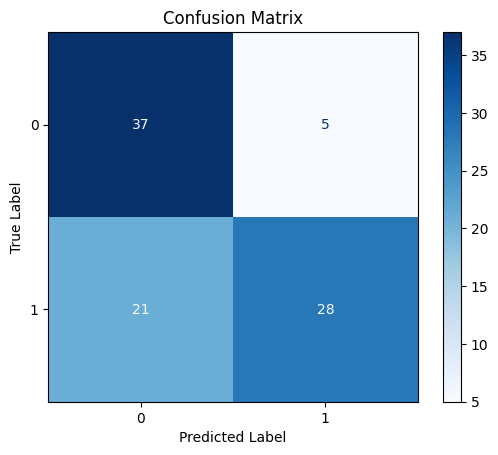

In [209]:
cm = confusion_matrix(y_test, y_pred)

# Access the classes_ attribute from the fitted 'best_model'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [210]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        42
           1       0.85      0.57      0.68        49

    accuracy                           0.71        91
   macro avg       0.74      0.73      0.71        91
weighted avg       0.75      0.71      0.71        91



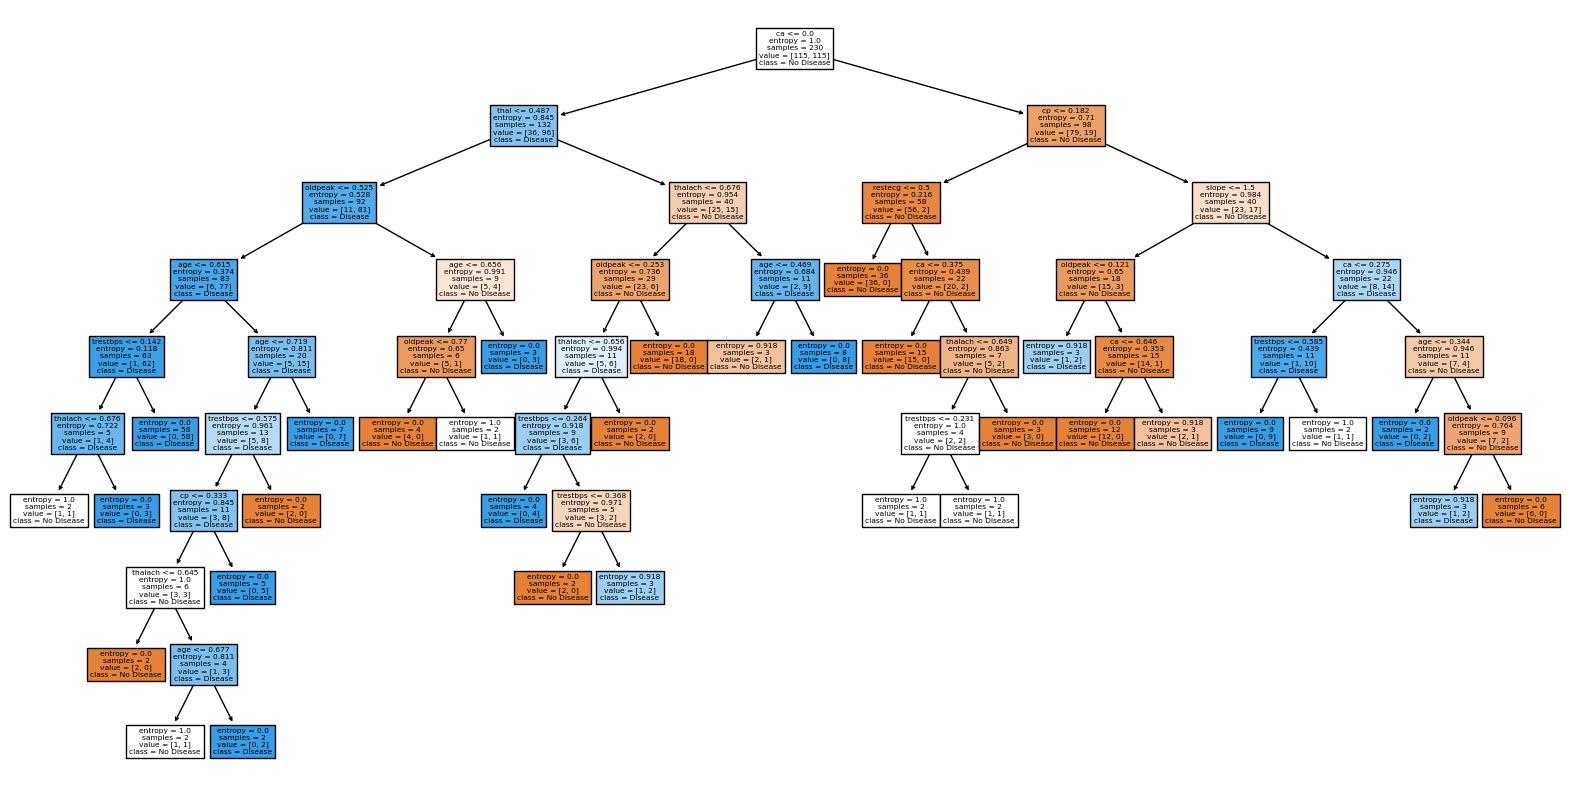

In [212]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))

# Changed dt_clf to best_model
plot_tree(best_model, filled=True, feature_names=X.columns,
          class_names=['No Disease', 'Disease'], impurity=True)

plt.show()